In [2]:
#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots
import scipy.stats as stats
import os 
import seaborn as sns #for styling the plots
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
zipcode_age_edu_income = pd.read_csv("zipcode_age_edu_income.csv")
zipcode_age_edu_income.head()

,zipcode,age_perc,edu_perc,income_perc
0,11211.0,91.509434,66.037736,50.943396
1,11216.0,87.264151,71.226415,42.924528
2,11237.0,86.792453,43.867925,37.264151
3,10027.0,75.000000,79.245283,34.433962
4,11105.0,91.037736,78.301887,58.490566


In [4]:
zipcode_houseprice = pd.read_csv("zipcode_houseprice.csv")
zipcode_houseprice.head()

,zipcode,house_perc
0,10001.0,88.484848
1,10002.0,95.757576
2,10003.0,9.696970
3,10009.0,13.939394
4,10011.0,24.848485


In [5]:
zipcode_dataset = zipcode_age_edu_income.merge(zipcode_houseprice, on="zipcode")
zipcode_dataset.head()

,zipcode,age_perc,edu_perc,income_perc,house_perc
0,11211.0,91.509434,66.037736,50.943396,30.909091
1,11216.0,87.264151,71.226415,42.924528,3.030303
2,11237.0,86.792453,43.867925,37.264151,45.454545
3,10027.0,75.000000,79.245283,34.433962,71.515152
4,11105.0,91.037736,78.301887,58.490566,98.787879


In [6]:
zipcode_age_edu_income

,zipcode,age_perc,edu_perc,income_perc
0,11211.0,91.509434,66.037736,50.943396
1,11216.0,87.264151,71.226415,42.924528
2,11237.0,86.792453,43.867925,37.264151
3,10027.0,75.000000,79.245283,34.433962
4,11105.0,91.037736,78.301887,58.490566
...,...,...,...,...
180,10119.0,98.584906,88.207547,99.056604
181,10279.0,6.603774,6.367925,6.603774
182,11371.0,6.603774,6.367925,6.603774
183,10309.0,21.698113,60.849057,84.905660


In [7]:
zipcode_dataset

,zipcode,age_perc,edu_perc,income_perc,house_perc
0,11211.0,91.509434,66.037736,50.943396,30.909091
1,11216.0,87.264151,71.226415,42.924528,3.030303
2,11237.0,86.792453,43.867925,37.264151,45.454545
3,10027.0,75.000000,79.245283,34.433962,71.515152
4,11105.0,91.037736,78.301887,58.490566,98.787879
...,...,...,...,...,...
157,11004.0,50.000000,69.811321,82.547170,61.212121
158,11363.0,16.981132,78.773585,85.849057,59.393939
159,11362.0,16.037736,74.056604,72.641509,35.757576
160,11040.0,33.018868,71.698113,80.660377,47.272727


In [8]:
gentrification_index = []
zipcode_gentrification = zipcode_dataset
for idx, row in zipcode_gentrification.iterrows():
    age_perc,edu_perc,income_perc,house_perc = row.values[1:]
    index = age_perc*edu_perc*income_perc*house_perc
    gentrification_index.append(index)

In [9]:
zipcode_gentrification["gentrification_index"] = gentrification_index

In [10]:
zipcode_gentrification[zipcode_gentrification["gentrification_index"]>=80**4]

,zipcode,age_perc,edu_perc,income_perc,house_perc,gentrification_index
4,11105.0,91.037736,78.301887,58.490566,98.787879,4.118918e+07
47,10001.0,83.490566,85.377358,82.075472,88.484848,5.176812e+07
57,10038.0,85.849057,82.075472,81.603774,96.363636,5.540798e+07


In [11]:
index_ = zipcode_gentrification.gentrification_index.values
zipcode_gentrification["percentile"] = zipcode_gentrification["gentrification_index"].apply(lambda x:stats.percentileofscore(index_, x)) 

In [12]:
zipcode_gentrification.head()

,zipcode,age_perc,edu_perc,income_perc,house_perc,gentrification_index,percentile
0,11211.0,91.509434,66.037736,50.943396,30.909091,9.515512e+06,77.777778
1,11216.0,87.264151,71.226415,42.924528,3.030303,8.084786e+05,12.345679
2,11237.0,86.792453,43.867925,37.264151,45.454545,6.449078e+06,61.728395
3,10027.0,75.000000,79.245283,34.433962,71.515152,1.463591e+07,85.185185
4,11105.0,91.037736,78.301887,58.490566,98.787879,4.118918e+07,98.765432


In [13]:
def judgement(x):
    if x>=80:
        return "gentrified"
    elif x >= 50:
        return "gentrifying"
    else:
        return "not-gentrified"
        

In [14]:
zipcode_gentrification["degree"] = zipcode_gentrification["percentile"].apply(lambda x:judgement(x))

In [15]:
judgement2idx = {"gentrified":1, "gentrifying":2, "not-gentrified":3}

In [16]:
zipcode_gentrification["degree_bin"] = zipcode_gentrification["degree"].apply(lambda x: judgement2idx[x])    

In [17]:
zipcode_gentrification.head()

,zipcode,age_perc,edu_perc,income_perc,house_perc,gentrification_index,percentile,degree,degree_bin
0,11211.0,91.509434,66.037736,50.943396,30.909091,9.515512e+06,77.777778,gentrifying,2
1,11216.0,87.264151,71.226415,42.924528,3.030303,8.084786e+05,12.345679,not-gentrified,3
2,11237.0,86.792453,43.867925,37.264151,45.454545,6.449078e+06,61.728395,gentrifying,2
3,10027.0,75.000000,79.245283,34.433962,71.515152,1.463591e+07,85.185185,gentrified,1
4,11105.0,91.037736,78.301887,58.490566,98.787879,4.118918e+07,98.765432,gentrified,1


## spatial 

In [18]:
#load the resulting shapefile using geopandas 
zipcode = gpd.read_file('./Data/ZIPCODE/ZIP_CODE_040114.shp')
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


<AxesSubplot:>

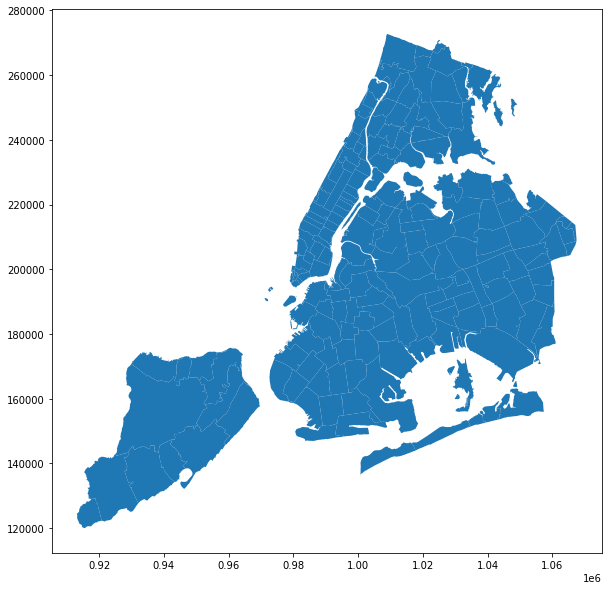

In [19]:
#and if we want to plot the entire shapefile
# zipcode.plot(figsize=(10,10),aspect='equal')
zipcode.plot(figsize=(10,10))
#map of zip code areas in NYC

In [20]:
# we see the field is textual; so convert it to numeric (int)
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
NYC_zipcode = zipcode['ZIPCODE'].unique()

In [21]:
zipcode_gentrification = zipcode_gentrification[zipcode_gentrification['zipcode'].isin(NYC_zipcode)]

In [22]:
def plot_loghist(x, bins): #introduce a function for plotting a log-scale histogram
  #it ensures log-scale binning and label on the original scale
    logbins = np.logspace(np.log10(x.min()),np.log10(x.max()),bins)
    plt.hist(x, bins=logbins)
    plt.xscale('log')

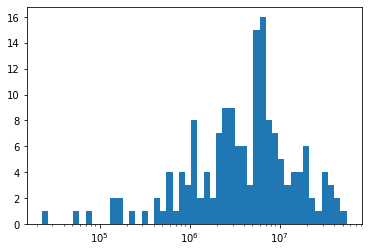

In [23]:
#records per zip code
plot_loghist(zipcode_gentrification['gentrification_index'],bins=50)

#### merge with zipcode shapefile
shapefile(.shp) is another geospatial data format. Please note that .shp file always come together with .shx and .dbj files, and it cannot be readable with out its mandatory supportive files. 

In [24]:
#merge data with the zip code shapes into a new geopandas dataframe
zipcode_gentrification_geo = zipcode.merge(zipcode_dataset,left_on='ZIPCODE',right_on='zipcode',how='left')

<AxesSubplot:>

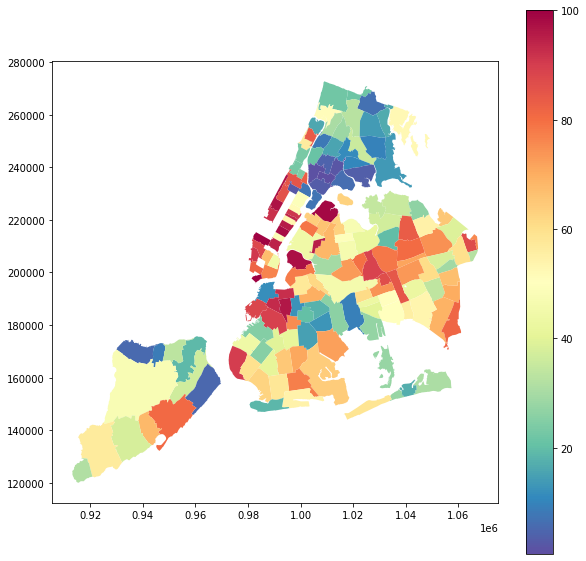

In [25]:
zipcode_gentrification_geo.plot(column='percentile',colormap='Spectral_r',legend=True,markersize=0.01,figsize=(10,10))

In [26]:
zipcode_gentrification_geo.dropna(axis=0,how='any', inplace=True)

<AxesSubplot:>

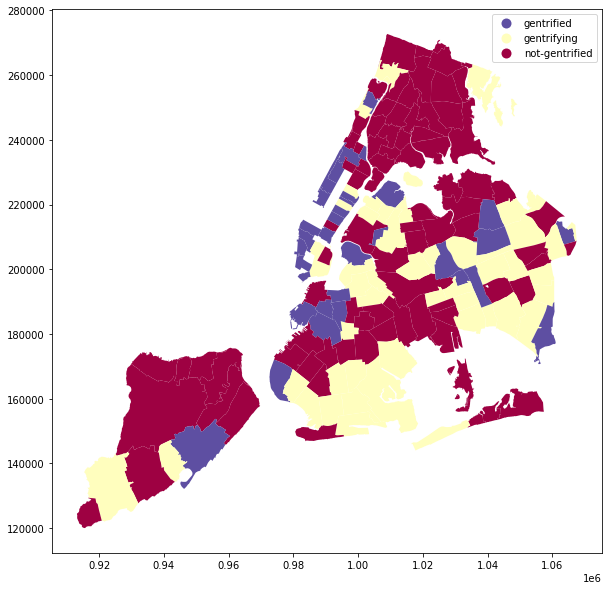

In [28]:
zipcode_gentrification_geo["degree_bin"] = zipcode_gentrification_geo["degree_bin"].astype(str)
zipcode_gentrification_geo.plot(column='degree',colormap='Spectral_r', legend=True,markersize=0.01,figsize=(10,10))